# Plots for manuscript
## This notebook produces graphical representations of how the contamination and sampling works in PoPS Border

In [1]:
from popsborder.scenarios import run_scenarios
from popsborder.inputs import load_configuration, load_scenario_table
from popsborder.outputs import save_scenario_result_to_pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pathlib import Path
datadir = Path("data")
basic_config = load_configuration(datadir / "config.yml")
# Modify a directory for the plots here
plotsdir = Path("plots")
# Make sure the directory exists
plotsdir.mkdir(exist_ok=True)

# Load csv with configurations for each example scenario
contaminate_scenarios = load_scenario_table(datadir / "contaminate_examples.csv")
sample_scenarios = load_scenario_table(datadir / "sampling_examples.csv")

## Contamination examples
Run simulation with 3 consignments using 15 different contamination approaches to show the range of contamination options available.\
Examples use three different fixed contamination rates and combinations of contamination unit (box or item) and contaminant arrangement (random, clustered continuous, or clustered random).

In [4]:
# Run contamination examples
num_consignments_1 = 3
contaminate_examples = run_scenarios(
    config=basic_config,
    scenario_table=contaminate_scenarios,
    seed=42,
    num_simulations=1,
    num_consignments=num_consignments_1,
    detailed=True,
)

Running scenario: contaminate example 1
Running scenario: contaminate example 2
Running scenario: contaminate example 3
Running scenario: contaminate example 4
Running scenario: contaminate example 5
Running scenario: contaminate example 6
Running scenario: contaminate example 7
Running scenario: contaminate example 8
Running scenario: contaminate example 9
Running scenario: contaminate example 10
Running scenario: contaminate example 11
Running scenario: contaminate example 12
Running scenario: contaminate example 13
Running scenario: contaminate example 14
Running scenario: contaminate example 15


In [5]:
# Separate item and inspection details from simulation totals and scenario config.
contaminate_examples_details = [i[0] for i in contaminate_examples]
contaminate_examples_results = [i[1:3] for i in contaminate_examples]

In [6]:
# Save dataframe from simulation totals and scenario config test 1.
contaminate_examples_df = save_scenario_result_to_pandas(
    contaminate_examples_results,
    config_columns=[
        "consignment name",
        "consignment/parameter_based/boxes/min",
        "consignment/parameter_based/boxes/max",
        "consignment/items_per_box/default",
        "contamination/contamination_unit",
        "contamination/contamination_rate/distribution",
        "contamination/contamination_rate/value",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "contamination/clustered/distribution",
        "contamination/clustered/contaminated_units_per_cluster",
        "contamination/clustered/random/cluster_item_width",
    ],
    result_columns=[
        "true_contamination_rate",
    ],
)

In [7]:
contaminate_examples_items_unstacked = [i[0] for i in contaminate_examples_details]

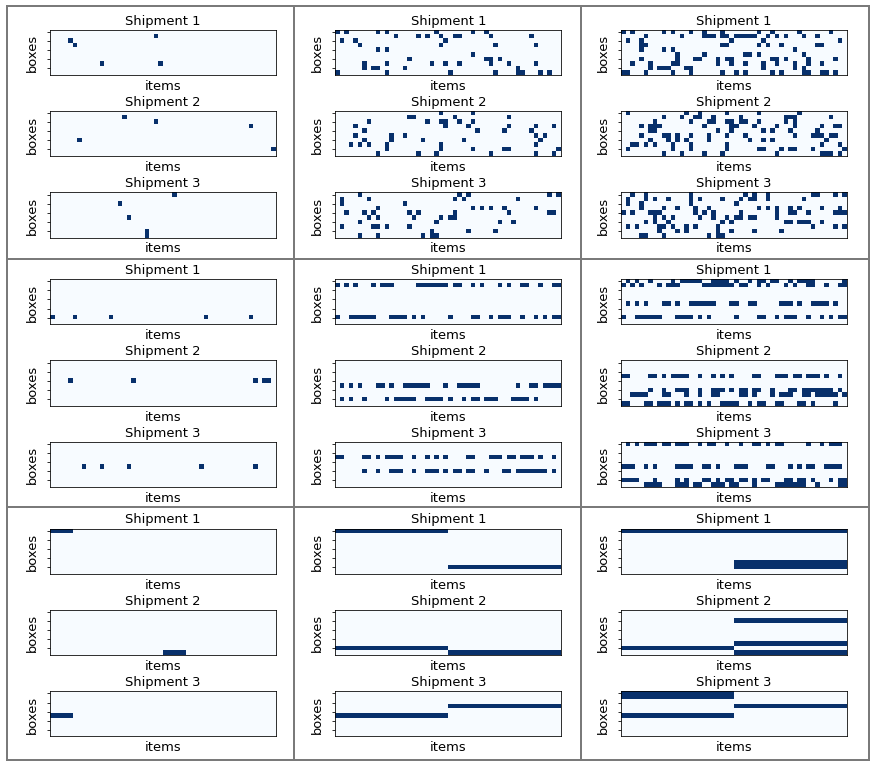

In [8]:
# Plot items for each item contamination unit scenarios
scenarios = contaminate_examples_df["consignment name"]

fig = plt.figure(figsize=(14.5, 13), constrained_layout=False)
outer_grid = fig.add_gridspec(3, 3)

scenario_index = 0
for a in range(3):
    for b in range(3):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 1, hspace=0.8)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        contaminate_examples_items = np.stack(contaminate_examples_items_unstacked[scenario_index])
        items_by_consignment = np.vsplit(contaminate_examples_items, num_consignments_1)
        for i in range(len(items_by_consignment)):
            axs[i].matshow(items_by_consignment[i], cmap='Blues')
            axs[i].set_yticklabels([])
            axs[i].tick_params(labeltop=False, top=False, bottom=False)
            axs[i].set_ylabel('boxes', fontsize=13)
            axs[i].set_xlabel('items', fontsize=13)
            axs[i].set_title("Shipment " + str(i + 1), fontsize=13)
        scenario_index += 1


from pylab import *
axs[i].plot([0.365, 0.365], [0.1, 0.905], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.64, 0.64], [0.1, 0.905], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.09, 0.915], [.37, .37], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.09, 0.915], [.635, .635], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.09, 0.915], [0.905, 0.905], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.09, 0.915], [0.1, 0.1], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.915, 0.915], [0.1, 0.905], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.09, 0.09], [0.1, 0.905], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)

plt.show()

fig.savefig(plotsdir / "contam_examples_items.jpg", dpi=800)

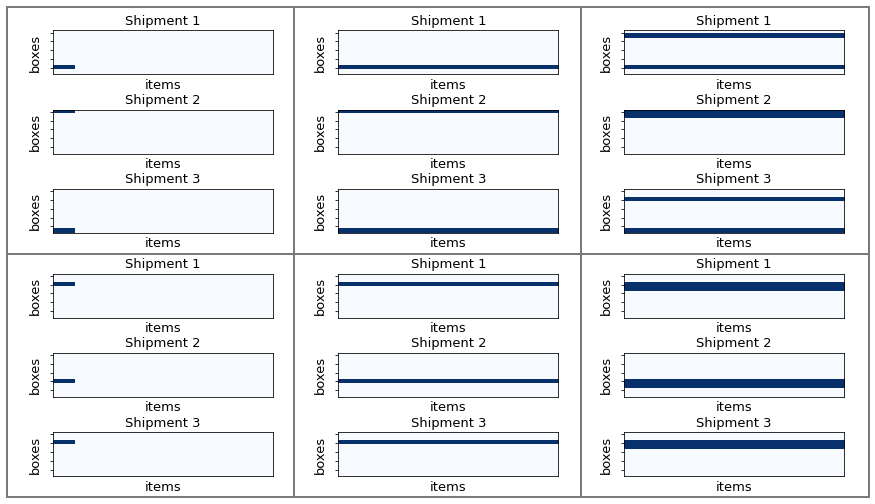

In [9]:
# Plot items for each box contamination unit scenarios
scenarios = contaminate_examples_df["consignment name"]

fig = plt.figure(figsize=(14.5, 8.2), constrained_layout=False)
outer_grid = fig.add_gridspec(2, 3)

# Starting with the first box contamination unit scenario
scenario_index = 9
for a in range(2):
    for b in range(3):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 1, hspace=0.8)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        contaminate_examples_items = np.stack(contaminate_examples_items_unstacked[scenario_index])
        items_by_consignment = np.vsplit(contaminate_examples_items, num_consignments_1)
        for i in range(len(items_by_consignment)):
            axs[i].matshow(items_by_consignment[i], cmap='Blues')
            axs[i].set_yticklabels([])
            axs[i].tick_params(labeltop=False, top=False, bottom=False)
            #if i == 1:
            axs[i].set_ylabel('boxes', fontsize=13)
            #if i == 2:
            axs[i].set_xlabel('items', fontsize=13)
            #if i == 0:
            axs[i].set_title("Shipment " + str(i + 1), fontsize=13)
        scenario_index += 1


from pylab import *
axs[i].plot([0.365, 0.365], [0.09, 0.92], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.64, 0.64], [0.09, 0.92], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.09, 0.915], [.502, .502], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.09, 0.915], [0.92, 0.92], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.09, 0.915], [0.09, 0.09], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.915, 0.915], [0.09, 0.92], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs[i].plot([0.09, 0.09], [0.09, 0.92], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)

plt.show()

fig.savefig(plotsdir / "contam_examples_boxes.jpg", dpi=800)

## Sampling examples
Run simulation with 3 consignments using 12 different sampling approaches to show the range of inspection options available.\
Examples use two different fixed sampling rates and combinations of inspection unit (box or item) and sample selection method (convenience, random, interval cluster, or random cluster).

In [10]:
# Run sampling examples
num_consignments = 3
sample_examples = run_scenarios(
    config=basic_config,
    scenario_table=sample_scenarios,
    seed=42,
    num_simulations=1,
    num_consignments=num_consignments,
    detailed=True,
)

Running scenario: sample example 1
Running scenario: sample example 2
Running scenario: sample example 3
Running scenario: sample example 4
Running scenario: sample example 5
Running scenario: sample example 6
Running scenario: sample example 7
Running scenario: sample example 8
Running scenario: sample example 9
Running scenario: sample example 10
Running scenario: sample example 11
Running scenario: sample example 12


In [11]:
# Separate item and inspection details from simulation totals and scenario config.
sample_examples_details = [i[0] for i in sample_examples]
sample_examples_results = [i[1:3] for i in sample_examples]

In [12]:
# Save simulation totals and scenario config to dataframe.
sample_examples_df = save_scenario_result_to_pandas(
    sample_examples_results,
    config_columns=[
        "inspection name",
        "consignment/parameter_based/boxes/min",
        "consignment/parameter_based/boxes/max",
        "consignment/items_per_box/default",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/proportion/value",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
    ],
    result_columns=[
        "avg_boxes_opened_completion",
        "avg_items_inspected_completion",
    ],
)

In [13]:
item_example_indexes = [0,6,1,7,2,8,3,9]
box_example_indexes = [4,10,5,11]

In [14]:
sample_examples_inspected_indexes = [i[1] for i in sample_examples_details]

In [15]:
item_scenarios = sample_examples_df.iloc[item_example_indexes,:]
item_inspected_indexes = [sample_examples_inspected_indexes[i] for i in item_example_indexes]
box_scenarios = sample_examples_df.iloc[box_example_indexes,:]
box_inspected_indexes = [sample_examples_inspected_indexes[i] for i in box_example_indexes]

num_items_per_consignment = 500
num_boxes_per_consignment = 10


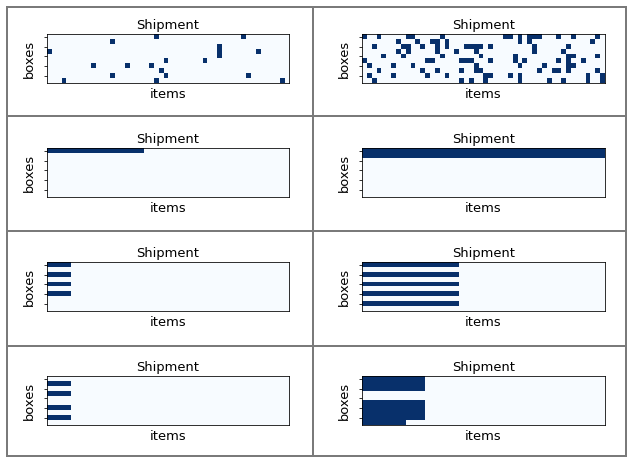

In [16]:
fig = plt.figure(figsize=(10,8), constrained_layout=False)
outer_grid = fig.add_gridspec(4, 2, hspace=0.4, wspace=0.3, top=0.86)

scenario_index = 0
for a in range(4):
    for b in range(2):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(1, 1)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for i in range(num_consignments):
            indexes = np.zeros(num_items_per_consignment, dtype=int)
            inpsected = item_inspected_indexes[scenario_index][i]
            np.put(indexes, inpsected, 1)
            indexes = np.array_split(indexes, num_boxes_per_consignment)
            axs.matshow(indexes, cmap='Blues', vmin=0, vmax=1)
            axs.set_yticklabels([])
            axs.tick_params(labeltop=False, top=False, bottom=False)
            axs.set_ylabel('boxes', fontsize=13)
            axs.set_xlabel('items', fontsize=13)
            axs.set_title("Shipment", fontsize=13)
        scenario_index += 1


from pylab import *
axs.plot([0.495, 0.495], [0.1, 0.88], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.93], [.49, .49], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.93], [0.88, 0.88], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.93], [0.1, 0.1], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.93, 0.93], [0.1, 0.88], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.07], [0.1, 0.88], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.93], [0.69, 0.69], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.93], [0.29, 0.29], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)


plt.show()


fig.savefig(plotsdir / "sample_examples_items.jpg", dpi=800)

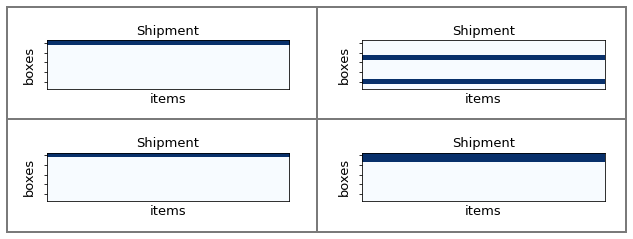

In [17]:
fig = plt.figure(figsize=(10,4), constrained_layout=False)
outer_grid = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3, top=0.83, bottom=0.14)

scenario_index = 0
for a in range(2):
    for b in range(2):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(1, 1)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for i in range(num_consignments):
            indexes = np.zeros(num_items_per_consignment, dtype=int)
            inpsected = box_inspected_indexes[scenario_index][i]
            np.put(indexes, inpsected, 1)
            indexes = np.array_split(indexes, num_boxes_per_consignment)
            axs.matshow(indexes, cmap='Blues', vmin=0, vmax=1)
            axs.set_yticklabels([])
            axs.tick_params(labeltop=False, top=False, bottom=False)
            axs.set_ylabel('boxes', fontsize=13)
            axs.set_xlabel('items', fontsize=13)
            axs.set_title("Shipment", fontsize=13)
        scenario_index += 1


from pylab import *
axs.plot([0.5, 0.5], [0.1, 0.88], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.93], [.49, .49], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.93], [0.88, 0.88], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.93], [0.1, 0.1], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.93, 0.93], [0.1, 0.88], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)
axs.plot([0.07, 0.07], [0.1, 0.88], color='#7A7A7A', lw=2,
         transform=gcf().transFigure, clip_on=False)

plt.show()

fig.savefig(plotsdir / "sample_examples_boxes.jpg", dpi=800)